In [7]:
import sys
print(sys.executable)


/Users/claudiasanchezserrano/Documents/GitHub/FisiComp26c/jupyter-env/bin/python3.14


In [8]:
import sys
!{sys.executable} -m pip install matplotlib


In [11]:
import numpy as np
import matplotlib.pyplot as plt

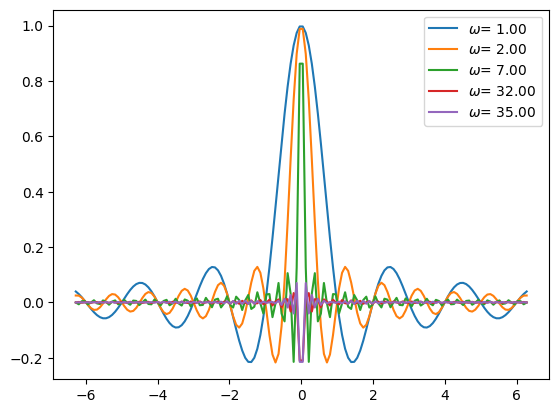

In [13]:
x = np.linspace(-2*np.pi,2*np.pi,150)
omega = np.array([1,2,7,32,35])
for i in range(len(omega)):
    y = np.sinc(omega[i]*x)
    plt.plot(x,y,label =r'$\omega$= %2.2f' %omega[i])
plt.legend()
plt.show()

Derivada asimetrica
$$
f'_i = \frac{f_{i+1}-f_i}{x_{i+1}-x_i}
$$
Derivada simétrica
$$
f'_i = \frac{f_{i-1}-f_{i-1}}{x_{i-1}-x_{i-1}}
$$

In [21]:
def deriv_Euler(f,x):
    df = np.zeros_like(f)
    for i in range(len(x)-1):
        df[i] = (f[i+1]-f[i])/(x[i+1]-x[i])
    df[-1] =- (f[-2]-f[-1])/(x[-1]-x[-2])
    #el ultimo punto se calcula a parte
    return df
def deriv_sim(f,x):
    df = np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = (f[1]-f[0])/(x[i+1]-x[i-1])
    df[0] =(f[1]-f[0])/(x[1]-x[0])
    df[-1] =-(f[-2]-f[-1])/(x[-1]-x[-2])
    return df

h= 0.1282282715750936 	 h^2= 0.016442489631135954 	 h^3= 0.0021083920257919616


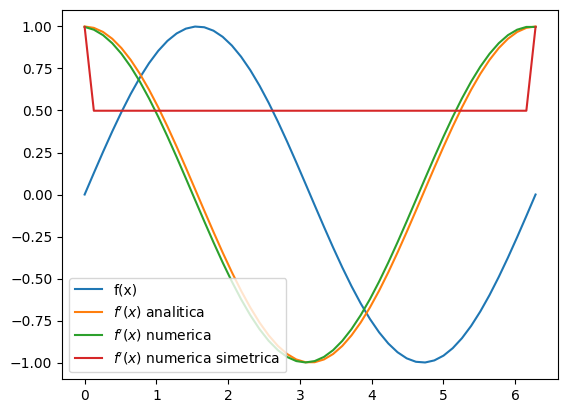

In [24]:
x = np.linspace(0,2*np.pi)
h = x[1]-x[0]
print('h=', h,'\t h^2=', h**2, '\t h^3=', h**3)
y = np.sin(x)
dy_a = np.cos(x)
dy_n = deriv_Euler(y,x)
dy_s = deriv_sim(y,x)
plt.plot(x,y,label= 'f(x)')
plt.plot(x,dy_a,label= r"$f'(x)$ analitica")
plt.plot(x,dy_n,label = r"$f'(x)$ numerica")
plt.plot(x,dy_s,label = r"$f'(x)$ numerica simetrica")
plt.legend()
plt.show()

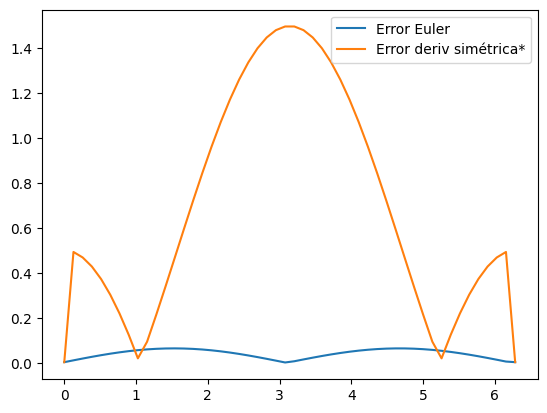

In [27]:
dif_E = abs(dy_a-dy_n)
dif_s = abs(dy_a-dy_s)
plt.plot(x,dif_E,label='Error Euler')
plt.plot(x,dif_s,label="Error deriv simétrica*")
plt.legend()
plt.show()

Derivada asimetrica de segundo orden
$$
f'_i = \frac{1.5f_i+2f_{i+1}-0.5f_{i+2}}{x_{i+1}-x_i}
$$

In [ ]:
def deriv_h2(f,x):
    df=np.zeros_like(f)
    for i in range(len(x)-2):
        df[i]= -1.5